   # Start with Python

Python installation

PythonXY
https://code.google.com/p/pythonxy/

WinPython
http://winpython.github.io/

Anaconda
https://store.continuum.io/cshop/anaconda/


Programming in Python
http://pythonic.eu/fjfi/

Web page of Image Processing course
http://www.kky.zcu.cz/cs/courses/zdo

Demo of image processing
http://scipy-lectures.github.io/packages/scikit-image/



# Run notebook

* Jupyter notebook cells
* Run cell: `Ctrl-Enter` 

In [1]:
%pylab inline

# from pylab import *
# import cStringIO
import urllib
import scipy
import scipy.misc
import skimage
import skimage.data
from skimage.filters import threshold_otsu
# from skimage.filters import gaussian_filter
from skimage.filters import gaussian as gaussian_filter
# from skimage.filter import threshold_otsu, gaussian_filter
from skimage.morphology import label
from scipy.ndimage.morphology import binary_closing, binary_erosion, binary_opening, binary_dilation

from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.io import imread
# import skimage.filter
# from skimage.filters import 


Populating the interactive namespace from numpy and matplotlib


## Little bit of python

In [2]:
print("hello")

hello


In [13]:
def myFunction(vstup):
    vystup = vstup + 6
    return vystup

myFunction(5)

11

In [4]:
for i in range(2,5):
    print(i)

2
3
4


In [14]:
pole = ['Franta', 'Jakub', 'Marta']

for jmeno in pole:
    print(jmeno)

Franta
Jakub
Marta


# Image Processing in Python

## Read image from URL

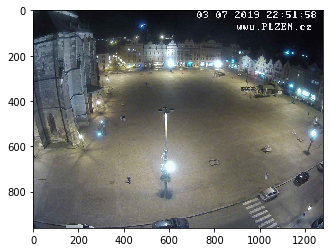

In [6]:
URL = "http://plzen.cz/cameraFeed.php"
img = imread(URL)

imshow(img)
# show()

## Colors

(960, 1280, 3)

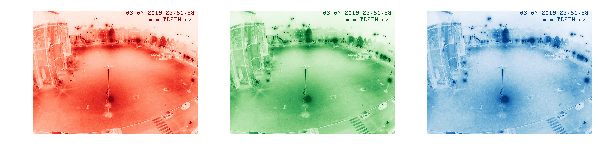

In [7]:
plt.figure(figsize=[10, 5])
subplot(131)
imshow(img[:, :, 0], cmap="Reds")
plt.axis("off")
subplot(132)
imshow(img[:, :, 1], cmap="Greens")
plt.axis("off")
subplot(133)
imshow(img[:, :, 2], cmap="Blues")
plt.axis("off")
img.shape

### Read gray image from file or URL

In [15]:
# URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
URL = "https://github.com/mjirik/ZDO/raw/master/objekty/dataset/01.jpg"

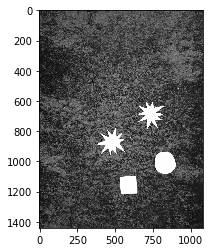

In [11]:
img = imread(URL, as_grey=True)
imshow(img, cmap='gray')

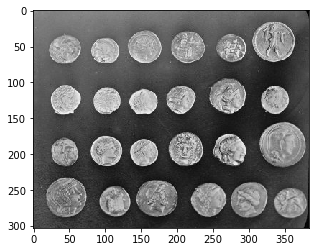

In [16]:
# ukazkova data
img = skimage.data.coins() / 255.0
imshow(img, cmap='gray')


### Manipulation with image data

In [17]:
img.shape

(303, 384)

In [18]:
img[50, 10]

0.43529411764705883

In [19]:
imgi = img.astype(np.int)
imgi

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
img[10:20,15:20]

array([[ 0.49411765,  0.48627451,  0.49411765,  0.50196078,  0.50588235],
       [ 0.49411765,  0.4745098 ,  0.4745098 ,  0.48627451,  0.49411765],
       [ 0.49019608,  0.49411765,  0.48627451,  0.48627451,  0.49019608],
       [ 0.48627451,  0.49803922,  0.48627451,  0.48235294,  0.49019608],
       [ 0.47843137,  0.47843137,  0.47843137,  0.48235294,  0.49019608],
       [ 0.4745098 ,  0.48235294,  0.48627451,  0.49411765,  0.49411765],
       [ 0.48627451,  0.47843137,  0.48235294,  0.48627451,  0.48627451],
       [ 0.48627451,  0.4745098 ,  0.47843137,  0.48235294,  0.48627451],
       [ 0.48627451,  0.47843137,  0.47843137,  0.48235294,  0.48235294],
       [ 0.47843137,  0.47843137,  0.48235294,  0.48235294,  0.48235294]])

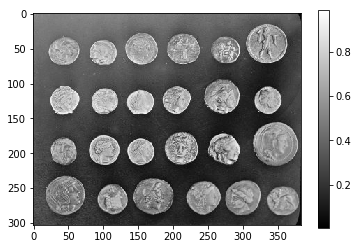

In [21]:
# img[10:200, 10:-100] = 100
imshow(img, cmap='gray')
colorbar()

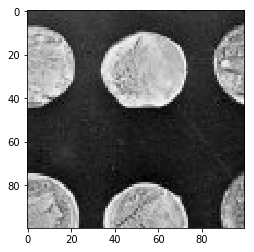

In [40]:
imshow(img[100:200, 100:200], cmap="gray")

# Segmentace

[cviceni7](http://nbviewer.jupyter.org/github/mjirik/ZDO/blob/master/ZDOcvSegmentation.ipynb)

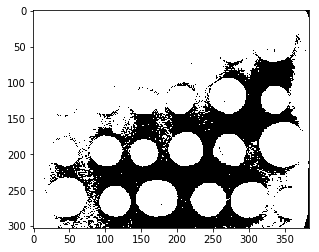

In [22]:
imthr = img > 0.2
imshow(imthr, cmap='gray')

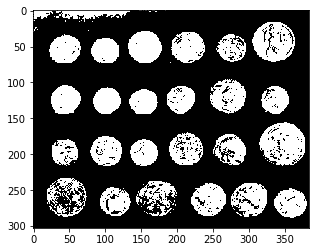

In [23]:
imthr = img > 0.50
imshow(imthr, cmap='gray')

## Image labeling

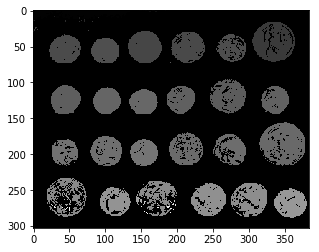

In [24]:
# blobs_labels = skimage.morphology.label(img, background=0)
imlabel = label(imthr, background=0)
imshow(imlabel, cmap='gray')

In [25]:
np.unique(imlabel)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119], dtype=int64)

In [26]:
# pocet labelu
print(np.max(imlabel))

119


### Zobrazení jednoho objektu

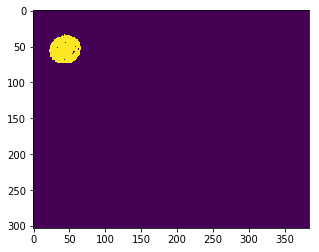

In [27]:
imshow(imlabel==35)

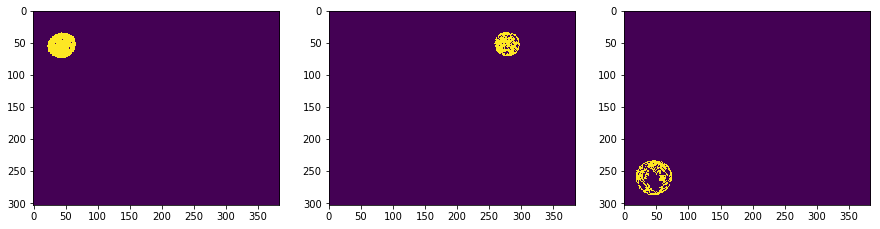

In [28]:
fig, axes = subplots(1,3, figsize=(15,4))
axes[0].imshow(imlabel==35)
axes[1].imshow(imlabel==36)
axes[2].imshow(imlabel==64)

### Color visualization of labeling

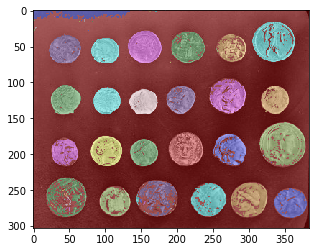

In [29]:
# Barevne provedeni
image_label_overlay = label2rgb(imlabel, image=img)
plt.imshow(image_label_overlay)

# Filtration

C:\Users\Jirik\Miniconda3\envs\lisa\lib\site-packages\skimage\filters\_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
C:\Users\Jirik\Miniconda3\envs\lisa\lib\site-packages\skimage\filters\_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


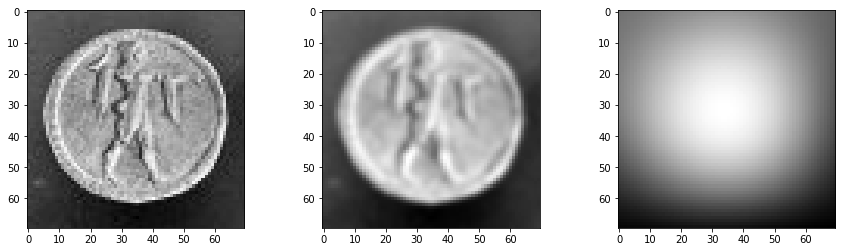

In [30]:
coins_zoom = img[10:80, 300:370]
from scipy import ndimage
gaussian_coins1 = gaussian_filter(coins_zoom, sigma=1)
gaussian_coins2 = gaussian_filter(coins_zoom, sigma=15)

fig, axes = subplots(1,3, figsize=(15,4))
axes[0].imshow(coins_zoom, cmap='gray')
axes[1].imshow(gaussian_coins1, cmap='gray')
axes[2].imshow(gaussian_coins2, cmap='gray')

## Optimální volba volba prahu - Otsu

http://scikit-image.org/docs/dev/auto_examples/plot_otsu.html

In [31]:
thr = threshold_otsu(img)
thr

0.41725643382352939

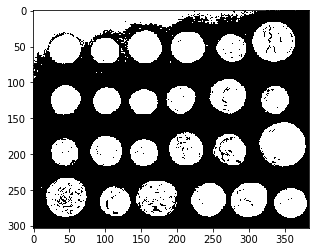

In [32]:
imthr = img > thr
imshow(imthr, cmap='gray')

Spocitame pocet objektu?

# Morfologicke operace

In [33]:
# plt.figure(figsize(10,10))
# imshow(imthr[0:20,260:310], interpolation='nearest')

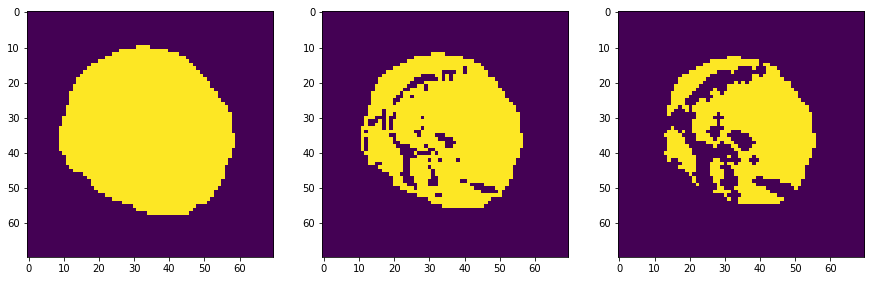

In [34]:

imer = binary_erosion(imthr, iterations=1)
imdil = binary_dilation(imthr, iterations=2)

fig, axes = subplots(1,3, figsize=(15,5))
axes[0].imshow(imdil[160:230,240:310], interpolation='nearest')
axes[1].imshow(imthr[160:230,240:310], interpolation='nearest')
axes[2].imshow(imer[160:230,240:310], interpolation='nearest')

In [35]:
ones([5,5])

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

Pocet prekryvajicich se objektu?

# Object description

[cviceni8](http://nbviewer.ipython.org/github/mjirik/ZDO/blob/master/ZDOcv8.ipynb)

* Velikost
* Eulerovo číslo 
    $$E = S - N$$
    kde $S$ je počet souvislých oblastí a $N$ je počet děr
* Výška, šířka
* Projekce
![projekce0](http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/projekce.jpg)
![projekce1](http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/projekce2.jpg)

* Výstřednost - poměr délek nejdelší tětivy a nejdelší tětivy k ní kolmé
* Podlouhlost
* Pravoúhlost
* Směr
* Nekompaktnost 
    $$\textrm{nekompaktnost}=\frac{(\textrm{délka hranice})^2}{\textrm{velikost}}$$


Využijeme funkce [regionprops](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops). 

Centroid  (48.0, 256.0)
Plocha  1
Obvod  0.0


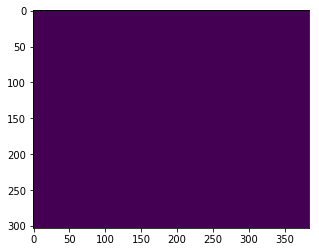

In [36]:
objnumber = 38

imshow(imlabel==objnumber)
# print np.unique(imlabel)


props = regionprops(imlabel+1)
print("Centroid ", props[objnumber].centroid)
print("Plocha ", props[objnumber].area)
print("Obvod ", props[objnumber].perimeter)




### Hromadné zpracování

In [37]:
for objnumber in range(1, len(props)):
    if props[objnumber].area > 2000:
        print("id ", objnumber)
        print("Centroid ", props[objnumber].centroid)
        print("Plocha ", props[objnumber].area)
        print("Obvod ", props[objnumber].perimeter)
        

id  27
Centroid  (43.911713286713287, 334.36101398601397)
Plocha  2288
Obvod  655.553390593
id  49
Centroid  (185.06034801925213, 348.02221399481675)
Plocha  2701
Obvod  679.009234716


# Zadani

Spocitejte kolik objektu urciteho typu se objevuje na obrazku z webkamery. Rozeznavame nasledujici typy objektu:

* Kolecko
* Ctvrec
* Obdelnik
* Hvezda

Trenovaci data naleznete [zde](https://github.com/mjirik/ZDO/tree/master/objekty)

 * Odevzdejte skript ve formátu `.ipynb` nebo `.py`
 * V názvu souboru uveďte své jméno
 * Jako parametr nechť je URL k obrázku

![ukazka](https://github.com/mjirik/ZDO/blob/master/objekty/01.jpg?raw=true)

# Classifiers

In [1]:
train_target = [1,1,1,2,2,2,3,3,3]

In [ ]:
# Features - příznaky
train_data = np.zeros([9,2])
print(train_data)
for objnumber in range(1, len(props)):
    train_data[objnumber - 1, 0] = props[objnumber].area
    train_data[objnumber - 1, 1] = props[objnumber].perimeter
print(train_data)

In [ ]:
# Training
from sklearn import svm
svc = svm.SVC()
svc.fit(train_data, train_target)

In [ ]:
# Testing
y_pred = svc.predict(test_data)
y_pred

In [ ]:
y_pred = svc.predict([[300, 7800]])
y_pred